In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
# Problem 1-(a)

In [13]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [14]:
# set the length of the n-bit input string. 
n = 4

In [15]:
# Constant Oracle
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)
if (output == 1):
    const_oracle.x(n)

print("Output: ", output)
const_oracle.draw()

Output:  1


q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘

In [16]:
# Balanced Oracle
balanced_oracle = QuantumCircuit(n+1)

# Random generate 4-bit
b_str = ""
for i in range(4):
    temp = np.random.randint(2)
    b_str += str(temp)

print("Input: ", b_str)

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

Input:  1001


┌───┐ ░                      ░ ┌───┐
q_0: ┤ X ├─░───■──────────────────░─┤ X ├
     └───┘ ░   │                  ░ └───┘
q_1: ──────░───┼────■─────────────░──────
           ░   │    │             ░      
q_2: ──────░───┼────┼────■────────░──────
     ┌───┐ ░   │    │    │        ░ ┌───┐
q_3: ┤ X ├─░───┼────┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_4: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘└───┘ ░

In [17]:
# Problem 1-(b)

In [18]:
# General Case (case = 'balanced' / 'constant')
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # Random generate 4-bit
        b_str = ""
        for i in range(4):
            temp = np.random.randint(2)
            b_str += str(temp)

        print("Input: ", b_str)

        # Place X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

        # Controlled-NOT gates
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        # Place X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        output = np.random.randint(2)
        if (output == 1):
            const_oracle.x(n)
        print("Output: ", output)
    
    # To show when we display the circuit
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" 
    return oracle_gate

In [19]:
# Performs the Deutsch-Joza algorithm
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.append(oracle, range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [20]:
n = 4
list = ['balanced', 'constant']
which_oracle = np.random.randint(2)
oracle_gate = dj_oracle(list[which_oracle], n)
dj_circuit = dj_algorithm(oracle_gate, n)
print("Oracle type: ", list[which_oracle])
dj_circuit.draw()

Output:  1
Oracle type:  constant


┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

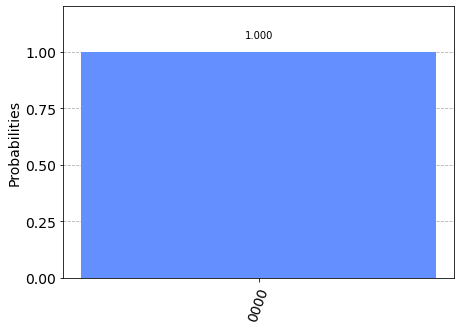

In [21]:
# Local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [22]:
# Real IBMQ
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-10-29 22:36:26,364: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_santiago


In [23]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


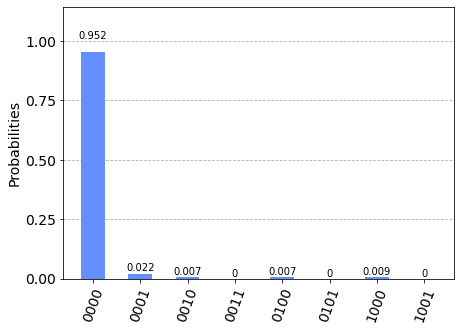

In [24]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)